In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/santa-2019-revenge-of-the-accountants/sample_submission.csv
/kaggle/input/santa-2019-revenge-of-the-accountants/family_data.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [15]:
import pandas as pd
family_data = pd.read_csv("../input/santa-2019-revenge-of-the-accountants/family_data.csv")
sample_submission = pd.read_csv("../input/santa-2019-revenge-of-the-accountants/sample_submission.csv")

In [16]:
family_data.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,68,4,26,3,45,80,61,89,6,31,6
1,1,66,17,82,4,29,52,46,77,75,60,2
2,2,89,23,5,27,1,24,53,11,9,17,2
3,3,66,80,35,59,4,96,87,94,1,33,3
4,4,29,52,24,33,27,2,45,20,12,21,3


In [17]:
family_data.describe()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,40.990167,41.726000,41.317000,41.325000,41.456833,41.601167,42.040167,43.189667,42.677500,42.792833,4.206333
std,1732.195139,29.257376,29.010168,28.911148,28.819458,28.791902,28.799398,28.704208,28.736985,28.947541,28.208867,1.545582
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,1499.750000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,18.000000,17.000000,19.000000,3.000000
50%,2999.500000,38.000000,39.000000,38.000000,38.000000,38.000000,38.000000,39.000000,40.000000,40.000000,39.000000,4.000000
75%,4499.250000,66.000000,66.000000,65.250000,64.000000,66.000000,66.000000,66.000000,67.000000,67.000000,66.000000,5.000000
max,5999.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,8.000000


In [18]:
family_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
family_id    6000 non-null int64
choice_0     6000 non-null int64
choice_1     6000 non-null int64
choice_2     6000 non-null int64
choice_3     6000 non-null int64
choice_4     6000 non-null int64
choice_5     6000 non-null int64
choice_6     6000 non-null int64
choice_7     6000 non-null int64
choice_8     6000 non-null int64
choice_9     6000 non-null int64
n_people     6000 non-null int64
dtypes: int64(12)
memory usage: 562.6 KB


In [19]:
family_data.shape

(6000, 12)

In [20]:
family_data.isnull().sum()

family_id    0
choice_0     0
choice_1     0
choice_2     0
choice_3     0
choice_4     0
choice_5     0
choice_6     0
choice_7     0
choice_8     0
choice_9     0
n_people     0
dtype: int64

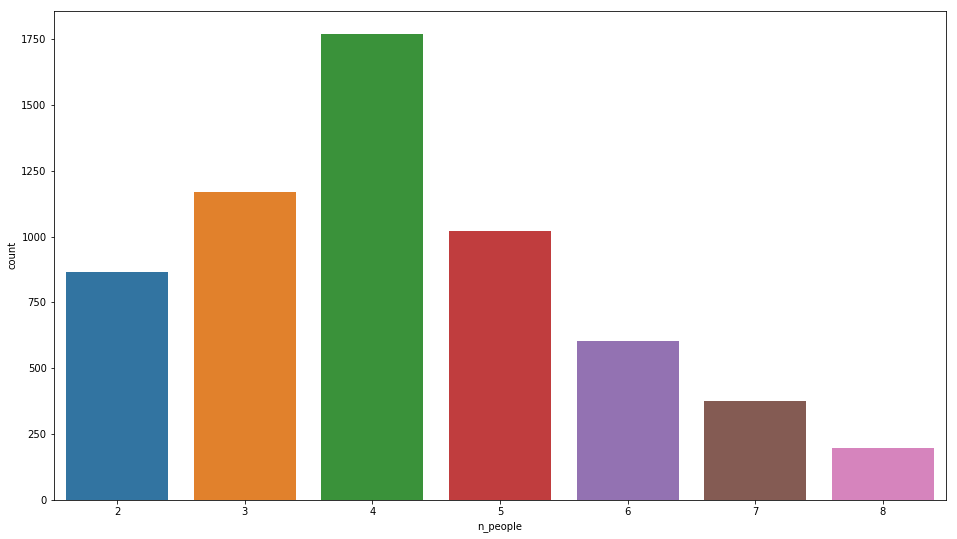

In [22]:
plt.figure(figsize=(16,9))
sns.countplot(family_data['n_people'])

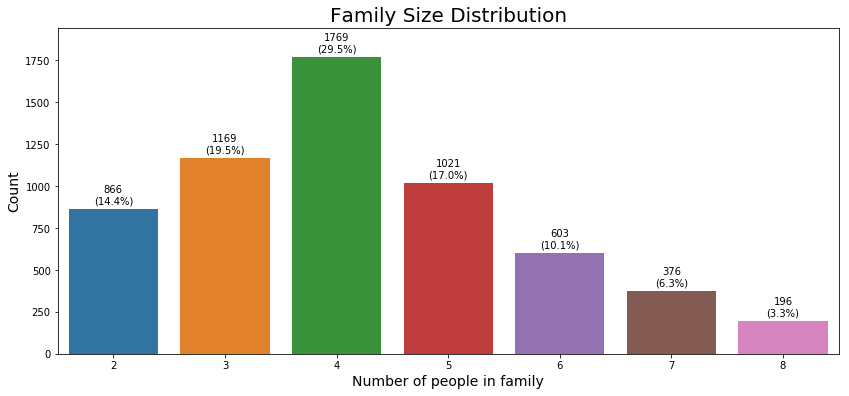

In [27]:
no_of_people = family_data['n_people'].value_counts().sort_index()

plt.figure(figsize=(14,6))
ax = sns.barplot(x=no_of_people.index, y=no_of_people.values)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}\n({p.get_height() / sum(no_of_people) * 100:.1f}%)', 
                xy=(p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,5), textcoords='offset points')
    
ax.set_ylim(0, 1.1*max(no_of_people))
plt.xlabel('Number of people in family', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Family Size Distribution', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Choice of each Family')

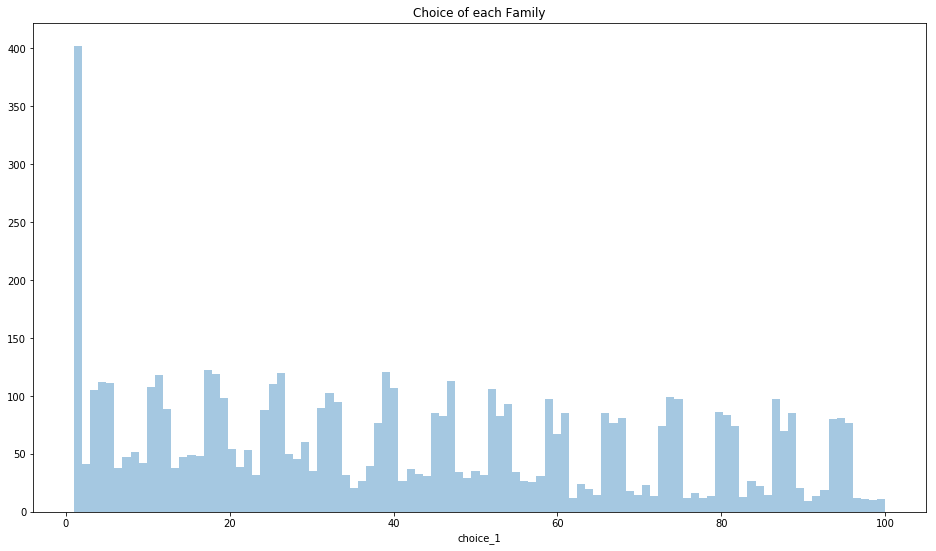

In [23]:
plt.figure(figsize=(16,9))
sns.distplot(family_data['choice_1'],bins=100,kde=False)
plt.title('Choice of each Family')

Text(0.5, 1.0, 'Choice of each Family')

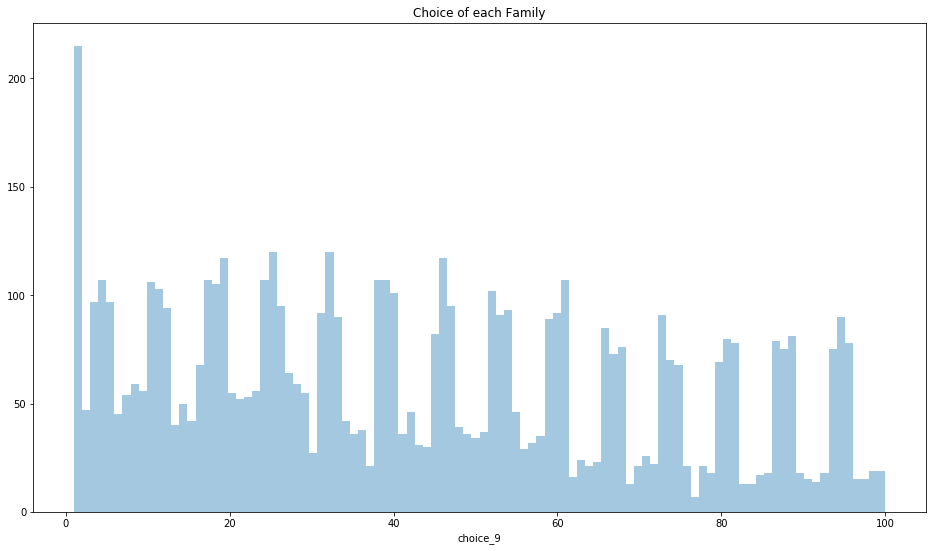

In [25]:
plt.figure(figsize=(16,9))
sns.distplot(family_data['choice_9'],bins=100,kde=False)
plt.title('Choice of each Family')

In [29]:
family_data_p=family_data[['family_id','n_people']].groupby('n_people',as_index=False).count().sort_values('n_people',ascending=True)
family_data_p=family_data_p.rename(columns={"family_id":"count"})
family_data_p

,n_people,count
0,2,866
1,3,1169
2,4,1769
3,5,1021
4,6,603
5,7,376
6,8,196


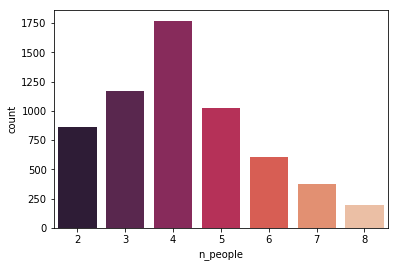

In [31]:
sns.barplot(x='n_people',y='count',data=family_data_p,palette='rocket')

In [41]:
sns.set(rc={'figure.figsize':(25,7)})

def choice(n_choice):
    date_christmas=datetime.datetime.strptime('2019-12-24',"%Y-%m-%d")
    choicedf=family_data[['family_id',n_choice]].groupby(n_choice,as_index=False).count()
    choicedf['date']=choicedf.apply(lambda x:(date_christmas + datetime.timedelta(days=-int(x[n_choice]))).strftime("%b %d - %a"),axis=1)   
    ax0=sns.barplot(x='date',y='family_id',data=choicedf,palette='rocket')
    for item in ax0.get_xticklabels():
            item.set_rotation(90)
    choice('choice_0')

In [43]:
def transform_choice(n_choice):
    date_christmas = datetime.datetime.strptime('2019-12-24', "%Y-%m-%d") # Happy Christmas !!
    choicedf = family_data[['family_id',n_choice]].groupby(n_choice, as_index=False).count()
    choicedf['date'] = choicedf.apply(lambda x: (date_christmas + datetime.timedelta(days=-int(x[n_choice]))).strftime("%b %d - %a"),axis=1)
    choicedf = choicedf.rename(columns={"family_id": "amount_families"})
    
    return choicedf

choice_0 = transform_choice('choice_0')
choice_1 = transform_choice('choice_1')
choice_2 = transform_choice('choice_2')
choice_3 = transform_choice('choice_3')
choice_4 = transform_choice('choice_4')
choice_5 = transform_choice('choice_5')
choice_6 = transform_choice('choice_6')
choice_7 = transform_choice('choice_7')
choice_8 = transform_choice('choice_8')
choice_9 = transform_choice('choice_9')

Text(0.5, 1.0, 'Choice 9')

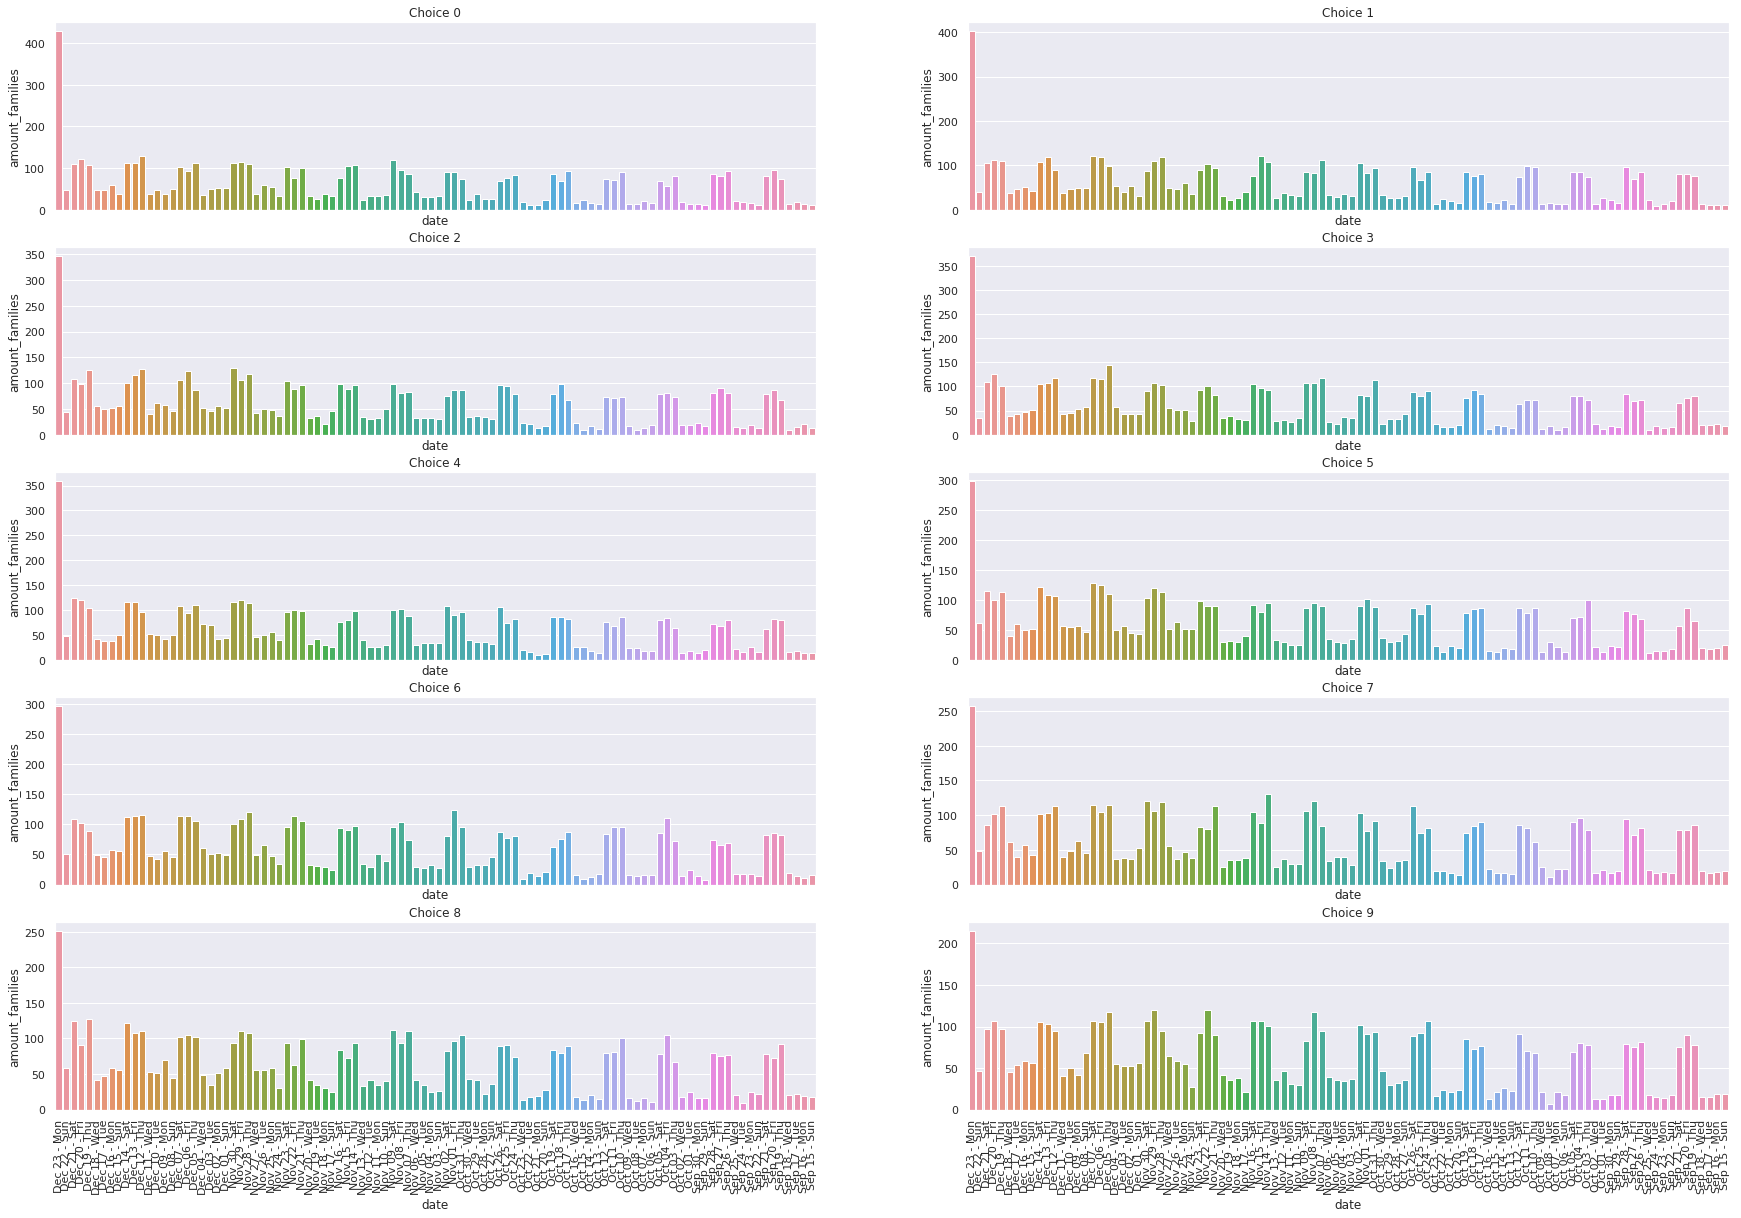

In [44]:
f, axes = plt.subplots(5, 2, figsize=(30, 20), sharex=True)
for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
sns.barplot(x='date', y='amount_families', data=choice_0, ax=axes[0,0]).set_title('Choice 0')
sns.barplot(x='date', y='amount_families', data=choice_1, ax=axes[0,1]).set_title('Choice 1')
sns.barplot(x='date', y='amount_families', data=choice_2, ax=axes[1,0]).set_title('Choice 2')
sns.barplot(x='date', y='amount_families', data=choice_3, ax=axes[1,1]).set_title('Choice 3')
sns.barplot(x='date', y='amount_families', data=choice_4, ax=axes[2,0]).set_title('Choice 4')
sns.barplot(x='date', y='amount_families', data=choice_5, ax=axes[2,1]).set_title('Choice 5')
sns.barplot(x='date', y='amount_families', data=choice_6, ax=axes[3,0]).set_title('Choice 6')
sns.barplot(x='date', y='amount_families', data=choice_7, ax=axes[3,1]).set_title('Choice 7')
sns.barplot(x='date', y='amount_families', data=choice_8, ax=axes[4,0]).set_title('Choice 8')
sns.barplot(x='date', y='amount_families', data=choice_9, ax=axes[4,1]).set_title('Choice 9')

In [ ]:
submission=pd.DataFrame({'family_id':family_data['family_id'],})